In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

In [94]:
df = pd.read_csv('Chocolate Sales.csv')

In [95]:
df.head(8)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184
5,Van Tuxwell,India,Smooth Sliky Salty,06/06/2022,"$5,376.00",38
6,Oby Sorrel,UK,99% Dark & Pure,25/01/2022,"$13,685.00",176
7,Gunar Cockshoot,Australia,After Nines,24/03/2022,"$3,080.00",73


In [96]:
df.tail(8)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
3274,Dennison Crosswaite,Canada,Organic Choco Syrup,28/01/2024,"$9,251.37",79
3275,Beverie Moffet,India,Almond Choco,24/05/2024,"$3,634.26",100
3276,Brien Boise,Australia,Peanut Butter Cubes,19/08/2024,$352.51,196
3277,Karlen McCaffrey,Australia,Spicy Special Slims,17/05/2024,"$5,303.58",354
3278,Jehu Rudeforth,USA,White Choc,07/06/2024,"$7,339.32",121
3279,Ches Bonnell,Canada,Organic Choco Syrup,26/07/2024,$616.09,238
3280,Dotty Strutley,India,Eclairs,28/07/2024,"$2,504.62",397
3281,Karlen McCaffrey,India,70% Dark Bites,23/05/2024,"$5,915.87",355


In [97]:
df.shape

(3282, 6)

In [98]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [100]:
df.describe()

,Boxes Shipped
count,3282.000000
mean,164.666971
std,124.024736
min,1.000000
25%,71.000000
50%,137.000000
75%,232.000000
max,778.000000


In [101]:
df['Amount'] = (
    df['Amount']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)


In [102]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 154.0+ KB


In [104]:
df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

Country
Australia      3646444.35
UK             3365388.90
India          3343730.83
USA            3313858.09
Canada         3078495.65
New Zealand    3043654.04
Name: Amount, dtype: float64

In [105]:
df.groupby('Product')['Boxes Shipped'].sum().sort_values(ascending=False)

Product
50% Dark Bites          29810
Smooth Sliky Salty      26969
Eclairs                 26678
Spicy Special Slims     26662
Caramel Stuffed Bars    26576
Drinking Coco           26402
Milk Bars               25436
Peanut Butter Cubes     25339
White Choc              25158
After Nines             25156
Mint Chip Choco         25149
99% Dark & Pure         24818
70% Dark Bites          24524
85% Dark Bars           23828
Manuka Honey Choco      23736
Fruit & Nut Bars        23632
Orange Choco            23607
Organic Choco Syrup     23602
Raspberry Choco         21672
Baker's Choco Chips     21448
Almond Choco            20558
Choco Coated Almonds    19677
Name: Boxes Shipped, dtype: int64

In [106]:
df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

Sales Person
Ches Bonnell           1022599.96
Oby Sorrel             1017204.12
Madelene Upcott        1010028.72
Kelci Walkden          1002929.10
Brien Boise             997326.48
Van Tuxwell             974425.09
Dennison Crosswaite     931849.57
Beverie Moffet          892421.37
Kaine Padly             849062.76
Marney O'Breen          836427.63
Barr Faughny            830826.91
Roddy Speechley         808359.58
Gunar Cockshoot         762283.43
Gigi Bohling            742296.51
Karlen McCaffrey        713832.64
Jehu Rudeforth          708505.03
Jan Morforth            706585.50
Curtice Advani          691797.92
Rafaelita Blaksland     668865.45
Husein Augar            656149.73
Andria Kimpton          648214.81
Mallorie Waber          642903.33
Camilla Castle          628613.13
Dotty Strutley          608101.17
Wilone O'Kielt          439961.92
Name: Amount, dtype: float64

In [107]:
df['Month'] = df['Date'].dt.to_period('M')
df.groupby('Month')['Amount'].sum()


Month
2022-01     896105.00
2022-02     699377.00
2022-03     749483.00
2022-04     674051.00
2022-05     752892.00
2022-06     865144.00
2022-07     803425.00
2022-08     743148.00
2023-01     958985.77
2023-02     749617.46
2023-03     807494.33
2023-04     727743.72
2023-05     811951.78
2023-06     932625.17
2023-07     861856.66
2023-08     793103.07
2024-01    1013621.82
2024-02     783102.44
2024-03     847791.96
2024-04     760132.50
2024-05     850906.79
2024-06     976162.77
2024-07     902250.63
2024-08     830599.99
Freq: M, Name: Amount, dtype: float64

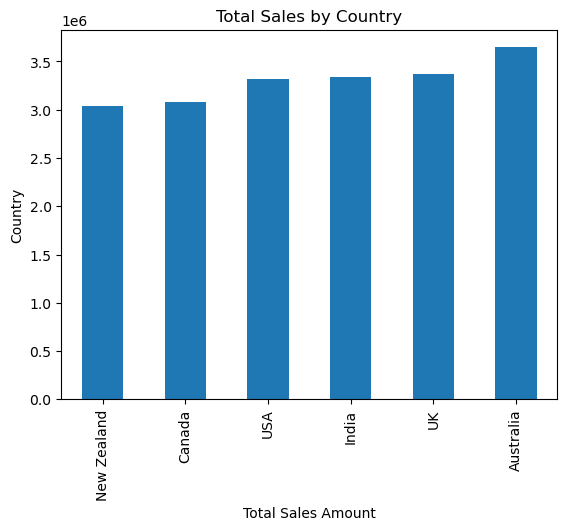

In [108]:

country_sales = df.groupby('Country')['Amount'].sum().sort_values()

country_sales.plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Total Sales Amount')
plt.ylabel('Country')
plt.show()

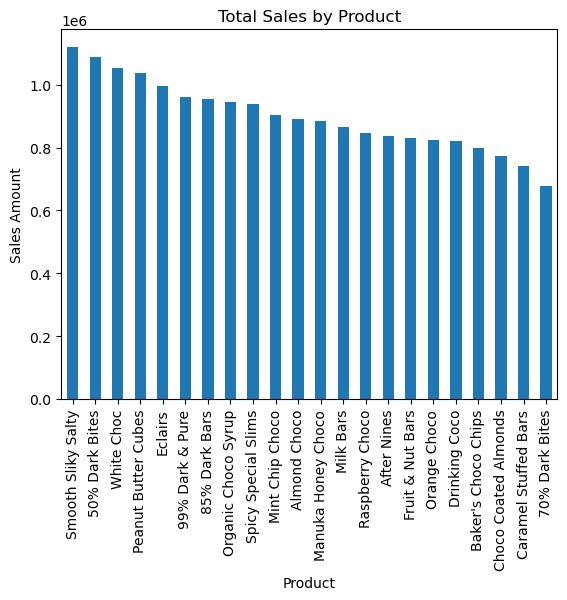

In [109]:
product_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

product_sales.plot(kind='bar')
plt.title('Total Sales by Product')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90)
plt.show()

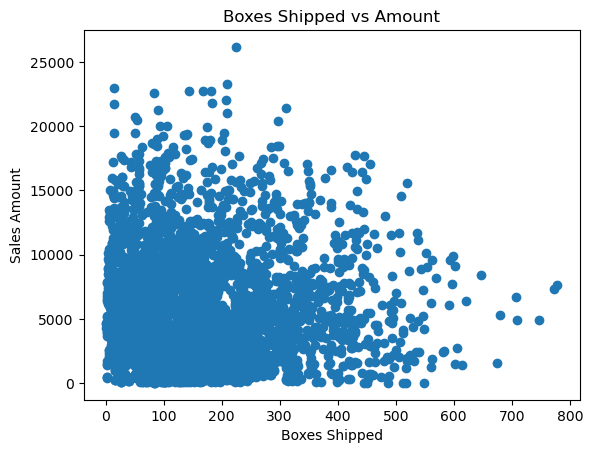

In [127]:
plt.scatter(df['Boxes Shipped'], df['Amount'])
plt.xlabel('Boxes Shipped')
plt.ylabel('Sales Amount')
plt.title('Boxes Shipped vs Amount')
plt.show()

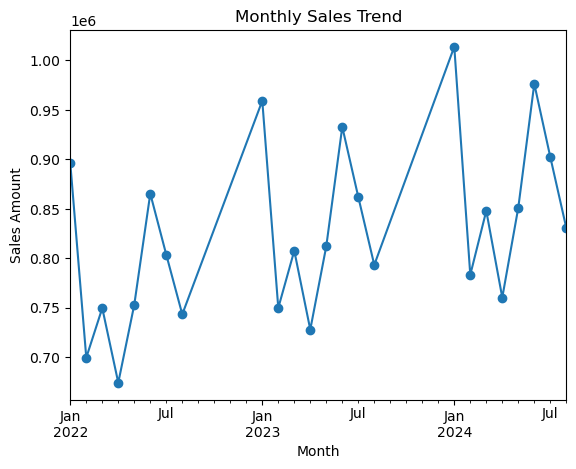

In [111]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()

In [112]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [113]:
threshold = df['Amount'].median()

df['High_Sales'] = (df['Amount'] > threshold).astype(int)

In [114]:
X = df[['Country', 'Product', 'Boxes Shipped', 'Date']]
y = df['High_Sales']

In [115]:
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X = X.drop(columns=['Date'])

C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_8744\1515116407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Month'] = X['Date'].dt.month
C:\Users\Devendra kushwah\AppData\Local\Temp\ipykernel_8744\1515116407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Day'] = X['Date'].dt.day


In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [117]:
cat_cols = ['Country', 'Product']
num_cols = ['Boxes Shipped', 'Month', 'Day']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)


In [118]:
pipe_lr = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=1000)
)

param_lr = {
    'logisticregression__C': [0.01, 0.1, 1, 10]
}

gs_lr = GridSearchCV(pipe_lr, param_lr, scoring='roc_auc', cv=5)
gs_lr.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Country',
                                                                          'Product']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Boxes '
                                                                          'Shipped',
                                                                          'Month',
                                                                          'Day'])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10]},
             scoring='roc_auc')

In [119]:
pipe_knn = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

param_knn = {
    'kneighborsclassifier__n_neighbors': [3,5,7,9],
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

gs_knn = GridSearchCV(pipe_knn, param_knn, scoring='roc_auc', cv=5)
gs_knn.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Country',
                                                                          'Product']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Boxes '
                                                                          'Shipped',
                                                                          'Month',
                                                                          'Day'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='roc_auc')

In [120]:
pipe_svm = make_pipeline(
    preprocessor,
    SVC(probability=True)
)

param_svm = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

gs_svm = GridSearchCV(pipe_svm, param_svm, scoring='roc_auc', cv=5)
gs_svm.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Country',
                                                                          'Product']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Boxes '
                                                                          'Shipped',
                                                                          'Month',
                                                                          'Day'])])),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='roc_auc')

In [121]:
pipe_dt = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=42)
)

param_dt = {
    'decisiontreeclassifier__max_depth': [3,5,10,None],
    'decisiontreeclassifier__min_samples_split': [2,5,10]
}

gs_dt = GridSearchCV(pipe_dt, param_dt, scoring='roc_auc', cv=5)
gs_dt.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Country',
                                                                          'Product']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Boxes '
                                                                          'Shipped',
                                                                          'Month',
                                                                          'Day'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'decisiontreeclassifier__max_depth': [3, 5, 10, None],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             scoring='roc_auc')

In [122]:
pipe_rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42)
)

param_rf = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [5,10,None]
}

gs_rf = GridSearchCV(pipe_rf, param_rf, scoring='roc_auc', cv=5)
gs_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Country',
                                                                          'Product']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Boxes '
                                                                          'Shipped',
                                                                          'Month',
                                                                          'Day'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': [5, 10, None],
                         'randomforestclassifier__n_estimators': [100, 200]},
             scoring='roc_auc')

In [123]:
def evaluate(name, model):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    }


In [124]:
results = [
    evaluate('Logistic Regression', gs_lr.best_estimator_),
    evaluate('KNN', gs_knn.best_estimator_),
    evaluate('SVM', gs_svm.best_estimator_),
    evaluate('Decision Tree', gs_dt.best_estimator_),
    evaluate('Random Forest', gs_rf.best_estimator_)
]

results_df = pd.DataFrame(results).sort_values('ROC-AUC', ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
4,Random Forest,0.951294,0.959627,0.942073,0.950769,0.974034
1,KNN,0.945205,0.950617,0.939024,0.944785,0.970949
2,SVM,0.829528,0.841772,0.810976,0.826087,0.901990
3,Decision Tree,0.864536,0.874608,0.850610,0.862442,0.894400
0,Logistic Regression,0.537291,0.535714,0.548780,0.542169,0.548567
